In [1]:
import pandas as pd
import glob
import collections
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

misreads = pd.DataFrame()
counts = dict()

In [2]:
def cleaning_data(dataset1, gold_standard_dataset1):
  dataset1_column_names = dataset1.columns
  gs_columns_names=gold_standard_dataset1.columns
  #delete any rows with accession numbers not in gold standard accessions
  #https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition
  #https://www.kite.com/python/answers/how-to-get-the-first-column-of-a-pandas-dataframe-as-a-series-in-python
  dataset1 = dataset1[dataset1[dataset1_column_names[0]].isin(list(gold_standard_dataset1.iloc[:, 0]))]
  gold_standard_dataset_copy = gold_standard_dataset1
  gold_standard_dataset1 = gold_standard_dataset1[gold_standard_dataset1[gs_columns_names[0]].isin(list(dataset1.iloc[:, 0]))]


  #sort rows based on accession 
  #https://datatofish.com/sort-pandas-dataframe/
  dataset1.sort_values(by=[dataset1_column_names[0]], inplace=True)
  gold_standard_dataset1.sort_values(by=[gs_columns_names[0]], inplace=True)

  #https://www.geeksforgeeks.org/reset-index-in-pandas-dataframe/
  dataset1.reset_index(inplace = True,drop = True)
  gold_standard_dataset1.reset_index(inplace = True,drop = True)

  #https://www.datasciencemadesimple.com/return-first-n-character-from-left-of-column-in-pandas-python/
  #https://www.geeksforgeeks.org/apply-uppercase-to-a-column-in-pandas-dataframe/
  #https://stackoverflow.com/questions/25698710/replace-all-occurrences-of-a-string-in-a-pandas-dataframe-python
  #https://www.geeksforgeeks.org/pandas-remove-special-characters-from-column-names/
  #formatting dataframes to look alike

  for i in range(1,len(dataset1_column_names)):
    dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
  for j in range(1,len(gs_columns_names)):
    gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
  return dataset1, gold_standard_dataset1


In [ ]:
'''def missed_allels(A1,A2,B1,B2,C1,C2):
  misreadsA=[*A1['A'].tolist(), *A2['A.1'].tolist()]
  print(misreadsA)

  misreadsB=[*B1['B'].tolist(), *B2['B.1'].tolist()]
  print(misreadsB)

  misreadsC=[*C1['C'].tolist(), *C2['C.1'].tolist()]
  print(misreadsC)

  A_allels = collections.Counter(misreadsA)
  B_allels = collections.Counter(misreadsB)
  C_allels = collections.Counter(misreadsC)
  return A_allels,B_allels,C_allels
  '''

In [3]:
def create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name):
  
  #fill each dict with allele and the number of times it was mispredicted

  dataset1_column_names = dataset1.columns
  gs_columns_names=gold_standard_dataset1.columns

  #make a list or dictionary for each HLA gene (A, B, C)
  A1,A2,B1,B2,C1,C2 = pd.DataFrame, pd.DataFrame, pd.DataFrame,pd.DataFrame, pd.DataFrame, pd.DataFrame

  #Outer left Join exclusive
  #https://www.youtube.com/watch?v=iYWKfUOtGaw
  #https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns
  #https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns?rq=1
  #https://stackoverflow.com/questions/50543326/how-to-do-left-outer-join-exclusion-in-pandas
  #A= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[1],gs_columns_names[2]]],dataset1[[dataset1_column_names[0],dataset1_column_names[1],dataset1_column_names[2]]],left_on=[gs_columns_names[1],gs_columns_names[2]], right_on = [dataset1_column_names[1],dataset1_column_names[2]], how='left',indicator=True).query('_merge=="left_only"')
  #https://stackoverflow.com/questions/61720614/how-to-drop-merge-column-in-pandas-merge
  A1= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[1]]],dataset1[[dataset1_column_names[0],dataset1_column_names[1]]],left_on=[gs_columns_names[1]], right_on = [dataset1_column_names[1]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
  A2= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[2]]],dataset1[[dataset1_column_names[0],dataset1_column_names[2]]],left_on=[gs_columns_names[2]], right_on = [dataset1_column_names[2]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
  print(A1)
  print(A2)
  B1= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[3]]],dataset1[[dataset1_column_names[0],dataset1_column_names[3]]],left_on=[gs_columns_names[3]], right_on = [dataset1_column_names[3]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
  B2= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[4]]],dataset1[[dataset1_column_names[0],dataset1_column_names[4]]],left_on=[gs_columns_names[4]], right_on = [dataset1_column_names[4]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)

  C1= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[5]]],dataset1[[dataset1_column_names[0],dataset1_column_names[5]]],left_on=[gs_columns_names[5]], right_on = [dataset1_column_names[5]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
  C2= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[6]]],dataset1[[dataset1_column_names[0],dataset1_column_names[6]]],left_on=[gs_columns_names[6]], right_on = [dataset1_column_names[6]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
 
  #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

  '''
  A,B,C = pd.DataFrame, pd.DataFrame, pd.DataFrame
  A= pd.merge(A1,A2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  B= pd.merge(B1,B2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  C= pd.merge(C1,C2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  '''

  #allels_missed = missed_allels(A1,A2,B1,B2,C1,C2)
  #return misread_gene_count, allels_missed
  return A1,A2,B1,B2,C1,C2

  #pd.series  then series to list 

In [4]:
def misreadsbyallele(dataset1, gold_standard_dataset1, tool_name):
  dataframe_list = create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name)
  A1 = dataframe_list[0]
  A2 = dataframe_list[1]
  B1 = dataframe_list[2]
  B2 = dataframe_list[3]
  C1 = dataframe_list[4]
  C2 = dataframe_list[5]
  
  misreadsA=[*A1['A'].tolist(), *A2['A.1'].tolist()]
  print(misreadsA)

  misreadsB=[*B1['B'].tolist(), *B2['B.1'].tolist()]
  print(misreadsB)

  misreadsC=[*C1['C'].tolist(), *C2['C.1'].tolist()]
  print(misreadsC)

  A_allels = collections.Counter(misreadsA)
  B_allels = collections.Counter(misreadsB)
  C_allels = collections.Counter(misreadsC)
  return A_allels,B_allels,C_allels

In [5]:
def misreadsbygene(dataset1, gold_standard_dataset1, tool_name):
  dataframe_list = create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name)
  A1 = dataframe_list[0]
  A2 = dataframe_list[1]
  B1 = dataframe_list[2]
  B2 = dataframe_list[3]
  C1 = dataframe_list[4]
  C2 = dataframe_list[5]


  a=len(A1)+len(A2)
  b=len(B1)+len(B2)
  c=len(C1)+len(C2)

  return a,b,c



In [6]:
def misread_gene_plot(misreads_dict):
  df = pd.DataFrame.from_dict(misreads_dict, orient='index', dtype=None, columns=['A','B','C'])
  print(df)
  print(type(df))
  return df


In [7]:
# MAIN - load required data
loc_gs = '../datasets'
gold_standard_dataset1 = pd.read_csv(loc_gs+'/1_gs.csv')
tool_names_and_loc = dict()
how_many_tools = int(input("How many tools regarding dataset1 would you like to input"))
for i in range(how_many_tools):
  caller = input("what is filepath to caller results csv") #/content/gdrive/MyDrive/test/OPTITYPE/optitype.csv /content/gdrive/MyDrive/test/phlat.csv
  tool_name = input("what is the name of this tool").lower()
  tool_names_and_loc[tool_name]=caller

#names = dict()
#all_data = list()

#print(all_data)


/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


           Run      A subject   A1
15   ERR009097  A2501     NaN  NaN
31   ERR009103  A2902     NaN  NaN
66   ERR009107  A2501     NaN  NaN
82   ERR009109  A3201     NaN  NaN
102  ERR009114  A2902     NaN  NaN
194  ERR009123  A2501     NaN  NaN
252  ERR009137  A3101     NaN  NaN
305  ERR009144  A3201     NaN  NaN
326  ERR009147  A68XX     NaN  NaN
393  ERR009155  A2902     NaN  NaN
434  ERR009163  A0206     NaN  NaN
           Run    A.1 subject   A2
15   ERR009103  A2601     NaN  NaN
362  ERR009163  A2601     NaN  NaN


/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


           Run      A  ERR
2    ERR009097  A2501  NaN
42   ERR009107  A2501  NaN
45   ERR009109  A3201  NaN
189  ERR009123  A2501  NaN
201  ERR009130  A2301  NaN
281  ERR009144  A3201  NaN
308  ERR009147  A68XX  NaN
420  ERR009163  A0206  NaN
Empty DataFrame
Columns: [Run, A.1, ERR]
Index: []


/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


         Run_x      A Run_y
17   ERR009097  A2501   NaN
35   ERR009103  A2902   NaN
75   ERR009107  A2501   NaN
93   ERR009109  A3201   NaN
116  ERR009114  A2902   NaN
224  ERR009123  A2501   NaN
291  ERR009137  A3101   NaN
352  ERR009144  A3201   NaN
375  ERR009147  A68XX   NaN
452  ERR009155  A2902   NaN
501  ERR009163  A0206   NaN
         Run_x    A.1 Run_y
337  ERR009146  A3002   NaN
461  ERR009168  A3201   NaN


/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


           Run      A  ERR
16   ERR009097  A2501  NaN
33   ERR009103  A2902  NaN
72   ERR009107  A2501  NaN
89   ERR009109  A3201  NaN
112  ERR009114  A2902  NaN
219  ERR009123  A2501  NaN
237  ERR009130  A2301  NaN
284  ERR009137  A3101  NaN
344  ERR009144  A3201  NaN
368  ERR009147  A68XX  NaN
443  ERR009155  A2902  NaN
492  ERR009163  A0206  NaN
           Run    A.1  ERR
297  ERR009146  A3002  NaN


/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


           Run      A  ERR
136  ERR009130  A2301  NaN
163  ERR009135  A2601  NaN
222  ERR009146  A2601  NaN
223  ERR009147  A68XX  NaN
           Run    A.1  ERR
236  ERR009129  A3101  NaN
366  ERR009146  A3002  NaN
411  ERR009154  A6801  NaN
540  ERR009168  A3201  NaN


/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


           Run      A subject   A1
163  ERR009130  A2301     NaN  NaN
256  ERR009147  A68XX     NaN  NaN
325  ERR009163  A0206     NaN  NaN
           Run    A.1 subject   A2
273  ERR009129  A3101     NaN  NaN
528  ERR009154  A6801     NaN  NaN
652  ERR009168  A3201     NaN  NaN
            A   B   C
arcashla   13  25  14
hlaforest   8  13  21
hlavbseq   13  25  13
phlat      13  14  16
optitype    8  19   9
rna2hla     6  16  14
<class 'pandas.core.frame.DataFrame'>
['arcashla', 'hlaforest', 'hlavbseq', 'phlat', 'optitype', 'rna2hla']


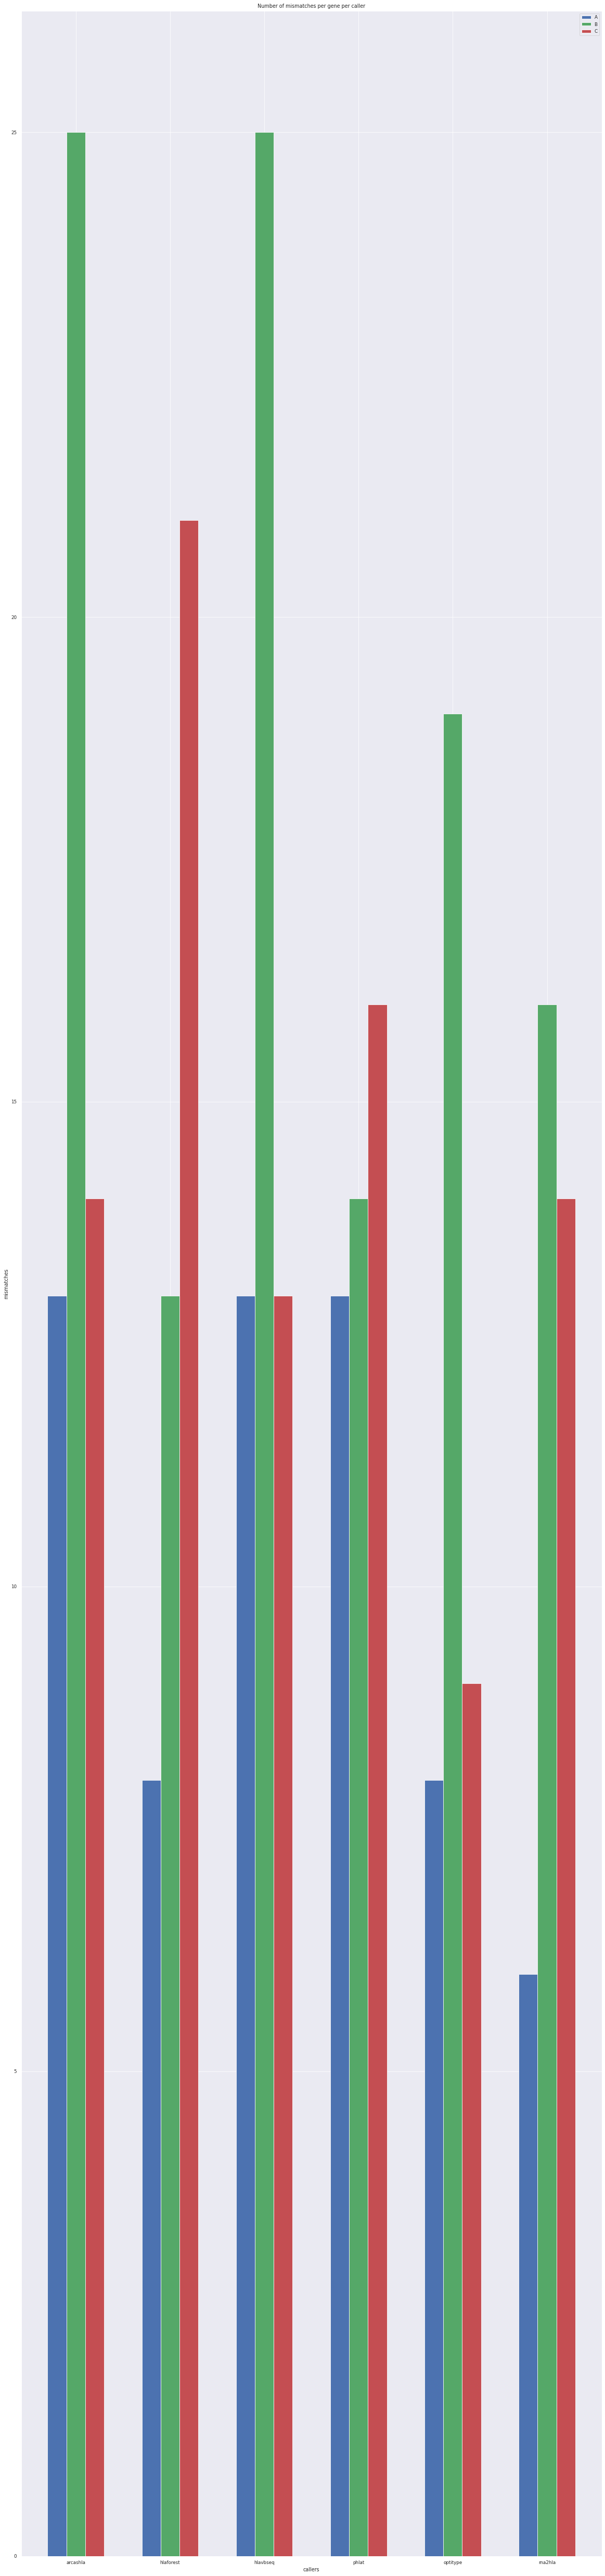

In [27]:
# MAIN - misreads by gene graph
misreadsbygene_dict = dict()
alltools = list()

for key,value in tool_names_and_loc.items():
  dataset1 = pd.read_csv(value)
  datasets_cleaned=cleaning_data(dataset1, gold_standard_dataset1)
  dataset1=datasets_cleaned[0]
  gold_standard_dataset1=datasets_cleaned[1]
  alltools.append(key)

  misreadsbygene_dict[key] = misreadsbygene(dataset1, gold_standard_dataset1, key)
  '''
  dataset1 = dataframes[0]
  gold_standard_dataset1 = dataframes[1]
  misread_genes=gene_misread(dataset1, gold_standard_dataset1, tool_name)
  all_data.append(misread_genes)
  '''

df = misread_gene_plot(misreadsbygene_dict)
print(alltools)
df['tools']=np.array(alltools)
#https://thispointer.com/pandas-convert-a-dataframe-column-into-a-list-using-series-to_list-or-numpy-ndarray-tolist-in-python/
#https://stackoverflow.com/questions/51865367/cannot-convert-the-series-to-class-int
A= df['A'].astype(int).to_list()
B= df['B'].astype(int).to_list()
C= df['C'].astype(int).to_list()
X = df['tools']

#https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
#https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
x = np.arange(len(X))
ax = plt.subplot(111)
ax.bar(x-0.2, A, width=0.2, color='b', align='center')
ax.bar(x, B, width=0.2, color='g', align='center')
ax.bar(x+0.2, C, width=0.2, color='r', align='center')

plt.xticks(x, X)
plt.xlabel("callers")
plt.ylabel("mismatches")
plt.title("Number of mismatches per gene per caller")
plt.legend((('A', 'B', 'C')))
plt.show()

#df.to_csv('misreadsbygene.csv', index=False)
#categorical_data = sns.load_dataset('/content/misreadsbygene.csv')


In [21]:
df2 = pd.melt(df, id_vars="tools",var_name="Allele",value_name="Count")

In [22]:
df2=df2.rename(columns={"tools":"Callers"})

/home/curryofdoom/anaconda3/envs/panel/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


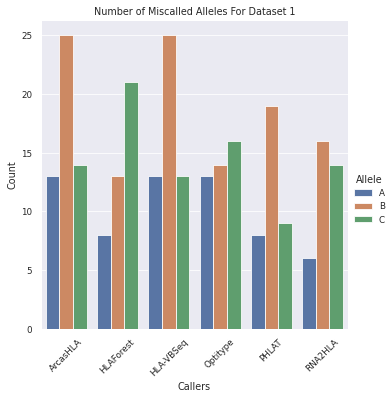

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,90)})
sns.set_context("paper")
sns.color_palette("pastel")
ax = sns.factorplot(x='Callers',y='Count',hue='Allele',data=df2,kind='bar').set(title="Number of Miscalled Alleles For Dataset 1")
ax.set_xticklabels(['ArcasHLA','HLAForest','HLA-VBSeq','Optitype','PHLAT','RNA2HLA'], rotation=45)
sns.despine()
#plt.savefig('../Figures/d1_miscalled_alleles.png', bbox_inches="tight",dpi=300)



/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


           Run      A subject   A1
15   ERR009097  A2501     NaN  NaN
31   ERR009103  A2902     NaN  NaN
66   ERR009107  A2501     NaN  NaN
82   ERR009109  A3201     NaN  NaN
102  ERR009114  A2902     NaN  NaN
194  ERR009123  A2501     NaN  NaN
252  ERR009137  A3101     NaN  NaN
305  ERR009144  A3201     NaN  NaN
326  ERR009147  A68XX     NaN  NaN
393  ERR009155  A2902     NaN  NaN
434  ERR009163  A0206     NaN  NaN
           Run    A.1 subject   A2
15   ERR009103  A2601     NaN  NaN
362  ERR009163  A2601     NaN  NaN
['A2501', 'A2902', 'A2501', 'A3201', 'A2902', 'A2501', 'A3101', 'A3201', 'A68XX', 'A2902', 'A0206', 'A2601', 'A2601']
['B4402', 'B4402', 'B5701', 'B3906', 'B4402', 'B4901', 'B4402', 'B3503', 'B5101', 'B1501', 'B1402', 'B5101', 'B4402', 'B4402', 'B4402', 'B5101', 'B3906', 'B3501', 'B1501', 'B1501', 'B3501', 'B5001', 'B1401', 'B1501', 'B55XX']
['C0202', 'C1601', 'C1203', 'C1402', 'C0202', 'C0305', 'C1402', 'C0202', 'C0304', 'C0303', 'C0304', 'C0606', 'C0303', 'C0102']


/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


           Run      A  ERR
2    ERR009097  A2501  NaN
42   ERR009107  A2501  NaN
45   ERR009109  A3201  NaN
189  ERR009123  A2501  NaN
201  ERR009130  A2301  NaN
281  ERR009144  A3201  NaN
308  ERR009147  A68XX  NaN
420  ERR009163  A0206  NaN
Empty DataFrame
Columns: [Run, A.1, ERR]
Index: []
['A2501', 'A2501', 'A3201', 'A2501', 'A2301', 'A3201', 'A68XX', 'A0206']
['B5701', 'B3906', 'B4901', 'B1801', 'B3503', 'B3906', 'B4001', 'B4001', 'B5001', 'B4403', 'B55XX', 'B4001', 'B3801']
['C0202', 'C1601', 'C1203', 'C1402', 'C1502', 'C0303', 'C0802', 'C1502', 'C0202', 'C1502', 'C0305', 'C1402', 'C0202', 'C0802', 'C0704', 'C0704', 'C0303', 'C0606', 'C0802', 'C0303', 'C0704']


/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


         Run_x      A Run_y
17   ERR009097  A2501   NaN
35   ERR009103  A2902   NaN
75   ERR009107  A2501   NaN
93   ERR009109  A3201   NaN
116  ERR009114  A2902   NaN
224  ERR009123  A2501   NaN
291  ERR009137  A3101   NaN
352  ERR009144  A3201   NaN
375  ERR009147  A68XX   NaN
452  ERR009155  A2902   NaN
501  ERR009163  A0206   NaN
         Run_x    A.1 Run_y
337  ERR009146  A3002   NaN
461  ERR009168  A3201   NaN
['A2501', 'A2902', 'A2501', 'A3201', 'A2902', 'A2501', 'A3101', 'A3201', 'A68XX', 'A2902', 'A0206', 'A3002', 'A3201']
['B5701', 'B3906', 'B4901', 'B3503', 'B5101', 'B1402', 'B5101', 'B5101', 'B3906', 'B0801', 'B0801', 'B2705', 'B5701', 'B0801', 'B0801', 'B5001', 'B1401', 'B5701', 'B55XX', 'B5501', 'B2705', 'B5701', 'B3801', 'B0801', 'B0801']
['C1601', 'C1203', 'C1402', 'C0305', 'C1402', 'C0802', 'C0304', 'C0303', 'C0304', 'C0606', 'C0802', 'C0303', 'C0102']


/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


           Run      A  ERR
16   ERR009097  A2501  NaN
33   ERR009103  A2902  NaN
72   ERR009107  A2501  NaN
89   ERR009109  A3201  NaN
112  ERR009114  A2902  NaN
219  ERR009123  A2501  NaN
237  ERR009130  A2301  NaN
284  ERR009137  A3101  NaN
344  ERR009144  A3201  NaN
368  ERR009147  A68XX  NaN
443  ERR009155  A2902  NaN
492  ERR009163  A0206  NaN
           Run    A.1  ERR
297  ERR009146  A3002  NaN
['A2501', 'A2902', 'A2501', 'A3201', 'A2902', 'A2501', 'A2301', 'A3101', 'A3201', 'A68XX', 'A2902', 'A0206', 'A3002']
['B5701', 'B3906', 'B4901', 'B3503', 'B5101', 'B1501', 'B1402', 'B5101', 'B5101', 'B3906', 'B1402', 'B5001', 'B55XX', 'B5501']
['C1601', 'C1203', 'C1402', 'C1502', 'C1502', 'C1502', 'C0305', 'C1402', 'C1601', 'C0304', 'C0303', 'C0304', 'C0606', 'C1601', 'C0303', 'C0102']


/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


           Run      A  ERR
136  ERR009130  A2301  NaN
163  ERR009135  A2601  NaN
222  ERR009146  A2601  NaN
223  ERR009147  A68XX  NaN
           Run    A.1  ERR
236  ERR009129  A3101  NaN
366  ERR009146  A3002  NaN
411  ERR009154  A6801  NaN
540  ERR009168  A3201  NaN
['A2301', 'A2601', 'A2601', 'A68XX', 'A3101', 'A3002', 'A6801', 'A3201']
['B4901', 'B3503', 'B1402', 'B0801', 'B0801', 'B2705', 'B0801', 'B1501', 'B1501', 'B0801', 'B5101', 'B5101', 'B1501', 'B55XX', 'B5501', 'B2705', 'B3801', 'B0801', 'B0801']
['C0304', 'C1601', 'C0304', 'C0303', 'C0305', 'C0304', 'C0704', 'C0704', 'C0704']


/tmp/ipykernel_3937/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_3937/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


           Run      A subject   A1
163  ERR009130  A2301     NaN  NaN
256  ERR009147  A68XX     NaN  NaN
325  ERR009163  A0206     NaN  NaN
           Run    A.1 subject   A2
273  ERR009129  A3101     NaN  NaN
528  ERR009154  A6801     NaN  NaN
652  ERR009168  A3201     NaN  NaN
['A2301', 'A68XX', 'A0206', 'A3101', 'A6801', 'A3201']
['B5701', 'B4002', 'B3906', 'B3501', 'B4901', 'B3501', 'B1501', 'B4002', 'B3501', 'B3501', 'B3906', 'B4002', 'B1401', 'B55XX', 'B5501', 'B3801']
['C0304', 'C0202', 'C1601', 'C1203', 'C0304', 'C1402', 'C0303', 'C0202', 'C0305', 'C0304', 'C1402', 'C0202', 'C0606', 'C0102']
['A0206', 'A2301', 'A2501', 'A2601', 'A2902', 'A3002', 'A3101', 'A3201', 'A6801', 'A68XX', 'B0801', 'B1401', 'B1402', 'B1501', 'B1801', 'B2705', 'B3501', 'B3503', 'B3801', 'B3906', 'B4001', 'B4002', 'B4402', 'B4403', 'B4901', 'B5001', 'B5101', 'B5501', 'B55XX', 'B5701', 'C0102', 'C0202', 'C0303', 'C0304', 'C0305', 'C0606', 'C0704', 'C0802', 'C1203', 'C1402', 'C1502', 'C1601'] ==============

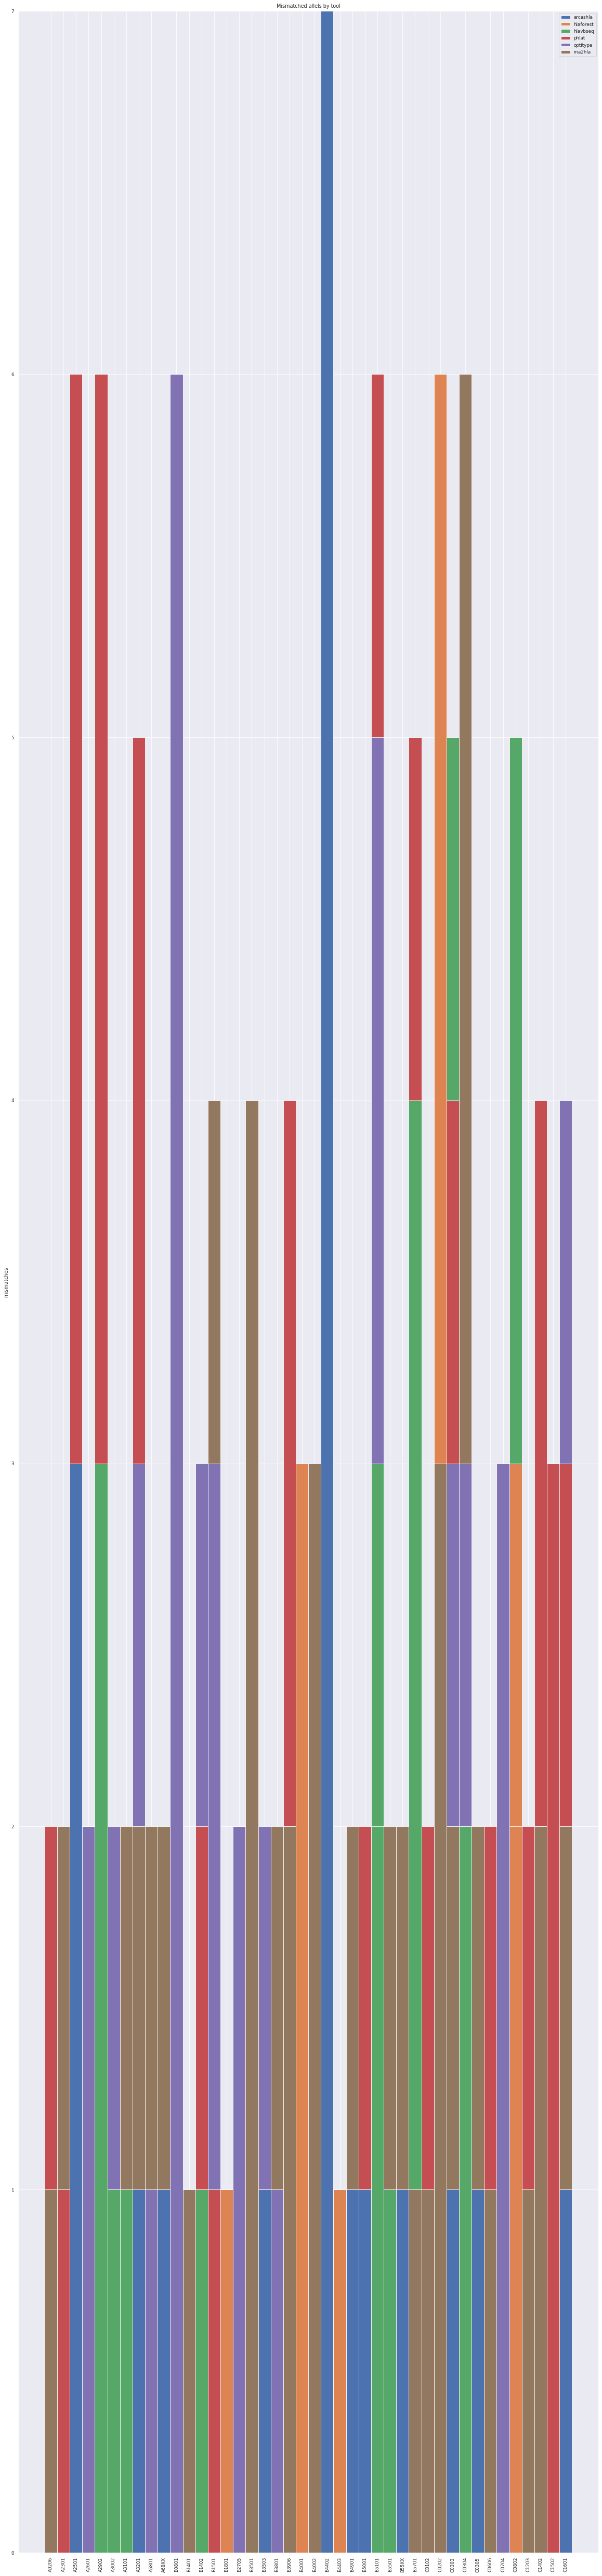

NameError: name 'counts2' is not defined

In [25]:
# MAIN - misreds by allele graph
misreadsbyallele_dict = dict()

for key,value in tool_names_and_loc.items():
  
  dataset1 = pd.read_csv(value)
  datasets_cleaned=cleaning_data(dataset1, gold_standard_dataset1)
  dataset1=datasets_cleaned[0]
  #gold_standard_dataset1=datasets_cleaned[1]
  #alltools.append(key)
  

  misreadsbyallele_dict[key] = misreadsbyallele(dataset1, gold_standard_dataset1, key)

#make a list with unique allels
#check if allele is in allele list for each tool and if so append count into a seperate list else append 0
#make each list wihtin counter into a bar graph using for loop
#x values are unique allels
#show plot
'''
tool_names_list, allels_list1, unique_allels_list, counts_list1 = list(),list(),list(),list()
mappings, allels_list2 = dict(),dict()
#misread_allele_plot(misreadsbyallele_dict)
for key, value in misreadsbyallele_dict.items():
  for i in range(len(value)):
    for key2, value2 in value[i].items():
      allels_list1.append(key2)
      counts_list1.append(value2)
      allels_list2[key2] = (value2)
      tool_names_list.append(key)
  mappings[key]=[allels_list2]
  allels_list2=dict()
#https://www.geeksforgeeks.org/python-get-unique-values-list/
temporary_set = list(set(allels_list1))

count=0
lis = mappings.items()[0].keys()
for haplo in temporary_set:
  for key in mappings.keys():
    for value in mappings.values():
      if haplo not in list(value[0].keys()):
        value[0][haplo] = 0
    mappings[key]=value[0].keys()

print(mappings,'===========')
    #if haplo not in value[0].keys():
      ##value[0][haplo]=0
  #print(key)
    #value2 = dict(sorted(value[0].items()))
      #value[0][haplo]=0
    #else:
  #mappings[key] = dict(sorted(value[0].items()))
#print(value3,"=====================================")

#print(mappings)
'''
'''
    if haplo not in value[0]:
      value[0].append(haplo)
      value[1].append(int(0))
    mappings[key]=value

print(mappings)
'''


mappings=dict()
tool_names_list, allels_list1, allels_list2, unique_allels_list, counts_list1 = list(),list(),list(),list(), list()
#misread_allele_plot(misreadsbyallele_dict)
for key, value in misreadsbyallele_dict.items():
  for i in range(len(value)):
    for key2, value2 in value[i].items():
      allels_list1.append(key2)
      allels_list2.append(key2)
      counts_list1.append(value2)
  mappings[key]=[allels_list1, counts_list1]
  allels_list1=list()
  counts_list1=list()
temporary_set = sorted(list(set(allels_list2)))
print(temporary_set,'=================================================================')

#for key in mappings.keys():

print(mappings)
fig, ax = plt.subplots()
cont = list()
for keys, values in mappings.items():
  labels=mappings[keys][0]
  counts=mappings[keys][1]
  print(len(counts))
  print(keys)
  #Justin's code
  lookup = {k: v for (k, v) in zip(labels, counts)}
  bottom = [lookup.get(x, 0) for x in temporary_set]
  cont.append(bottom)
  print(bottom,'[[[[[[[[\n',lookup)
  if len(cont) > 1:
    print(bottom, temporary_set)
    ax.bar(temporary_set, bottom, 1, bottom=cont[-2], label=keys)
  elif len(cont) == 1:
    ax.bar(temporary_set, bottom, 1, label=keys)
print(mappings.keys())

ax.set_ylabel('mismatches')
ax.set_title('Mismatched allels by tool')
ax.legend()
plt.xticks(rotation='vertical')

plt.show()


'''

fig, ax = plt.subplots()

labels=mappings['OPTITYPE'][0]
counts=mappings['OPTITYPE'][1]
labels_2=mappings['PHLAT'][0]
counts2=mappings['PHLAT'][1]
ax.bar(labels, counts, 1, label='opt')
bottom = list()
'''
if len(counts) > len(counts2):
  bottom = counts[:len(counts2)]
else:
  bottom = counts + [0]*(len(counts2)-len(counts))
'''
#Justin's code
lookup = {k: v for (k, v) in zip(labels, counts)}
bottom = [lookup.get(x, 0) for x in labels_2]
print(bottom, counts,'***********************************************************************')
#myList = (self.myList + [0] * 4)[:4]

ax.bar(labels_2, counts2, 1, bottom=bottom, label='phlat')

ax.set_ylabel('Allele')
ax.set_title('Mismatched allels by tool')
ax.legend()
plt.xticks(rotation='vertical')

plt.show()
'''

'''
      tool_names_list.append(key)
      allels_list.append(key2)
      counts_list.append(value2)
unique_allels_list = list(set(allels_list))
tool_hold = tool_names_list[0]
'''

  


      
print(allels_list,'\n', tool_names_list,'\n',counts_list)
#STUCK BUT WORKING ON IT
'''
#https://www.geeksforgeeks.org/python-ways-to-remove-duplicates-from-list/
counter = 0
list_final_count_for_each_tool = list()
unique_allels_list = [i for n, i in enumerate(allels_list) if i not in allels_list[:n]]
for key, value in misreadsbyallele_dict.items():
  for i in range(len(value)):
    for key2, value2 in value[i].items():
      if key2 not in unique_allels_list:
        counts_list.append(0)
      else:
        counts_list.append(int(value2))
      tool_names_list.append(key)
    list_final_count_for_each_tool.append(counts_list)
'''
'''
  #https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/
  if counter == 0:
    plt.bar(unique_allels_list, list_final_count_for_each_tool[counter])
    holding_for_bottom = list_final_count_for_each_tool[counter]
  else:
    holding_for_bottom = holding_for_bottom + list_final_count_for_each_tool[counter]
    plt.bar(unique_allels_list, list_final_count_for_each_tool[counter], bottom=holding_for_bottom)
  counter = counter + 1

plt.xlabel("allels")
plt.ylabel("misread")
plt.legend(alltools)
plt.title("misread_allels")
plt.show()
'''

#print(unique_allels_list, list_final_count_for_each_tool)
'''
index_lists = list()
for i in range(1,len(alltools)):
  #https://www.programiz.com/python-programming/methods/list/index
  #https://www.w3schools.com/python/ref_func_range.asp
  index=tool_names_list.index(alltools[i])
  index_lists.append(index)
print(index_lists, tool_names_list, alltools)
'''

'''
dataframe2 = pd.DataFrame(columns=['tools','allels','counts'])
dataframe2['tools']=tool_names_list
dataframe2['allels']=allels_list
dataframe2['counts']=counts_list
dataframe2
'''

In [26]:
dataframe2
import seaborn as sns
sns.set_theme(style="whitegrid")
ax=sns.barplot(x="allels",y="counts",data=dataframe2,hue="tools")

NameError: name 'dataframe2' is not defined